# SM Campaign Details
## Submission for Stirring Minds 
The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

Approved_conversions is the target variable

https://www.kaggle.com/loveall/clicks-conversion-tracking?select=KAG_conversion_data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw = pd.read_csv('KAG_conversion_data.csv')
raw.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
data = raw.copy()
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
data.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


### Correlation Analysis

- Impressions
- Clicks
- Spent
- Total_Conversion
- Approved_Conversion

These columns will be used for correlation. The others seem categorical

In [6]:
col = ['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']
dataC = data[col]

<AxesSubplot:>

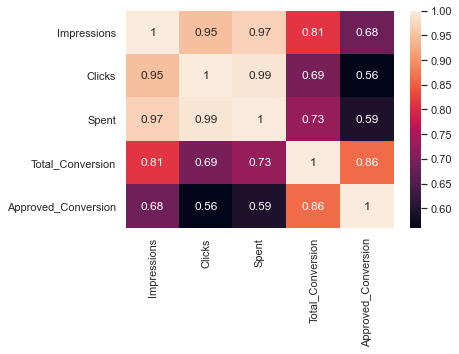

In [7]:
datacorr = dataC.corr()
sns.heatmap(datacorr,annot = True)

### EDA

In [8]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


No missing fields available, hence no extraplation/field dropping needed

#### XYZ_CAMPAIGN ID

In [9]:
cam_map = {916:'Campaign_1',936:"Campaign_2",1178:'Campaign_3'}
data['xyz_campaign_id'] = data['xyz_campaign_id'].map(cam_map)

In [10]:
data['xyz_campaign_id'].value_counts()

Campaign_3    625
Campaign_2    464
Campaign_1     54
Name: xyz_campaign_id, dtype: int64

Type of ad shown isn't uniformly distributed, Ad 3 was clearly the most displayed.

In [11]:
pd.crosstab(data['xyz_campaign_id'],data['age'])

age,30-34,35-39,40-44,45-49
xyz_campaign_id,,,,
Campaign_1,29,12,6,7
Campaign_2,196,89,75,104
Campaign_3,201,147,129,148


#### Comparing Campaigns to Approved Conversions

In [12]:
pd.crosstab(data['xyz_campaign_id'],data['Approved_Conversion'])

Approved_Conversion,0,1,2,3,4,5,6,7,8,9,10,12,13,14,17,21
xyz_campaign_id,,,,,,,,,,,,,,,,
Campaign_1,30,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Campaign_2,292,162,9,1,0,0,0,0,0,0,0,0,0,0,0,0
Campaign_3,237,217,77,34,24,7,7,4,5,3,4,1,1,2,1,1


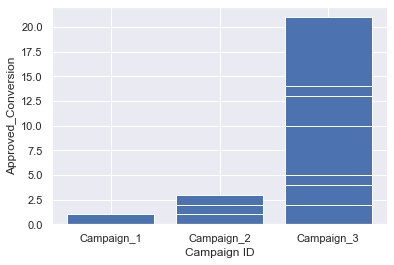

In [13]:
plt.bar(data["xyz_campaign_id"], data["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.xlabel("Campaign ID")
plt.show()

Clearly, campaign 3 is the most successful at conversions

#### Age

In [14]:
data['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

30-34 age group was the most targeted.

In [15]:
pd.crosstab(data['age'],data['Approved_Conversion'])

Approved_Conversion,0,1,2,3,4,5,6,7,8,9,10,12,13,14,17,21
age,,,,,,,,,,,,,,,,
30-34,200,147,33,15,11,3,3,2,2,2,2,1,1,2,1,1
35-39,119,91,18,10,5,2,2,0,1,0,0,0,0,0,0,0
40-44,103,79,18,3,2,0,2,1,0,1,1,0,0,0,0,0
45-49,137,86,17,7,6,2,0,1,2,0,1,0,0,0,0,0


<BarContainer object of 1143 artists>

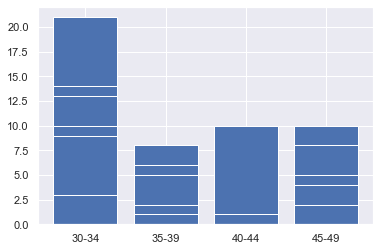

In [16]:
plt.bar(data['age'],data['Approved_Conversion'])

In [17]:
pd.crosstab(index=[data['xyz_campaign_id'],data['Approved_Conversion']], columns=data['age'], margins=True)

age                                  30-34  35-39  40-44  45-49   All
xyz_campaign_id Approved_Conversion                                  
Campaign_1      0                       18      6      2      4    30
                1                       11      6      4      3    24
Campaign_2      0                      117     57     50     68   292
                1                       71     30     25     36   162
                2                        7      2      0      0     9
                3                        1      0      0      0     1
Campaign_3      0                       65     56     51     65   237
                1                       65     55     50     47   217
                2                       26     16     18     17    77
                3                       14     10      3      7    34
                4                       11      5      2      6    24
                5                        3      2      0      2     7
                6                        3      2      2      0     7
                7                        2      0      1      1     4
                8                        2      1      0      2     5
                9                        2      0      1      0     3
                10                       2      0      1      1     4
                12                       1      0      0      0     1
                13                       1      0      0      0     1
                14                       2      0      0      0     2
                17                       1      0      0      0     1
                21                       1      0      0      0     1
All                                    426    248    210    259  1143

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

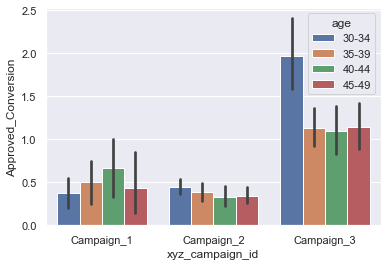

In [18]:
sns.barplot(data = data, x = data['xyz_campaign_id'], y = data['Approved_Conversion'],hue = data['age'])

Campaign 1 seemed to score best in the 40 - 44 age group

Campaign 2 seemed to score best in the 30 -34 age group

Campaign 3 seemed to score best in the 30 - 34 age group

#### Gender

In [19]:
data['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

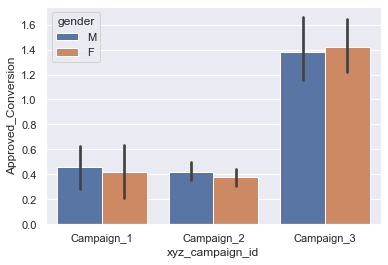

In [20]:
sns.barplot(data= data,x = data['xyz_campaign_id'],y = data['Approved_Conversion'],hue = data['gender'] )
#sns.barplot(data= data,x = data['xyz_campaign_id'],y = data['Approved_Conversion'],hue = data['age'])

Conversion rates were about equal for both genders

#### Interest

- Codes for various interest types
- Seems Categorical

In [21]:
#Value_Counts of interests

In [22]:
data['interest'].value_counts()

16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
32      33
22      33
19      32
25      26
30      25
31      25
2       25
24      24
7       24
23      23
36      21
65      19
66      11
107      8
110      8
102      7
112      7
105      7
101      7
108      7
100      6
111      6
113      6
109      6
106      5
104      5
103      5
114      5
Name: interest, dtype: int64

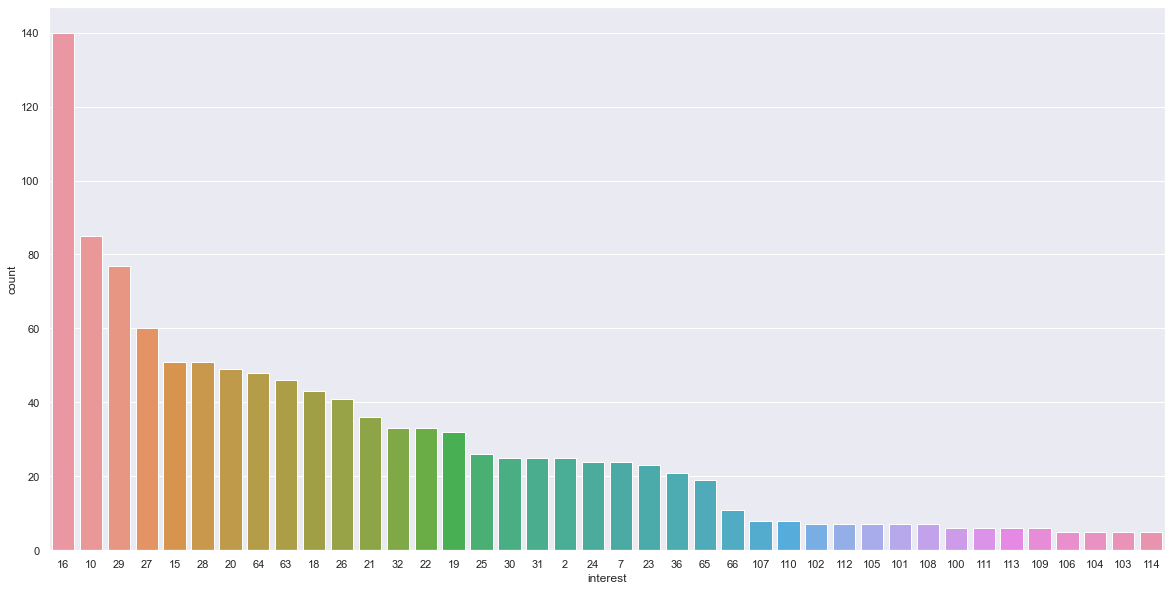

In [23]:
plt.figure(figsize =(20,10))

sns.countplot(x = data['interest'],order = data['interest'].value_counts().index)
plt.show()

#Interest vs Age

In [25]:
pd.crosstab(index = data['age'],columns = data['interest'])

interest,2,7,10,15,16,18,19,20,21,22,...,105,106,107,108,109,110,111,112,113,114
age,,,,,,,,,,,,,,,,,,,,,
30-34,11,11,25,23,47,19,10,21,14,10,...,2,1,2,1,1,2,2,2,1,0
35-39,5,6,18,13,30,6,4,6,5,12,...,1,1,2,2,2,2,1,2,2,2
40-44,8,5,20,6,28,4,6,9,6,7,...,2,2,2,2,1,2,2,2,1,1
45-49,1,2,22,9,35,14,12,13,11,4,...,2,1,2,2,2,2,1,1,2,2


In [26]:
#approved_conversion vs interest

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

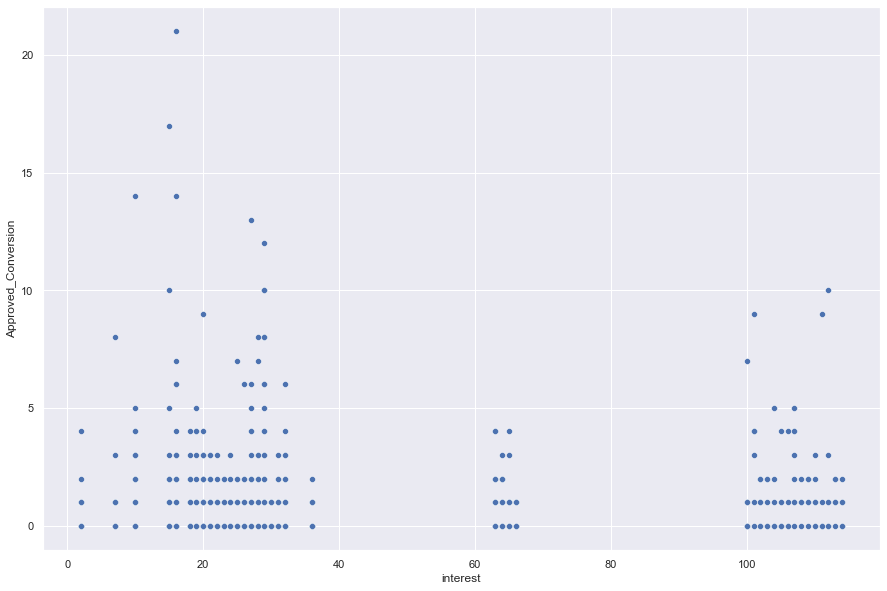

In [27]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = data['interest'], y = data['Approved_Conversion'])

Approved Conversions cluster within certain range of interests

- 0 to 40, with significant clustering around ~16 to ~35
- ~62 to ~65
- ~100 to ~114

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

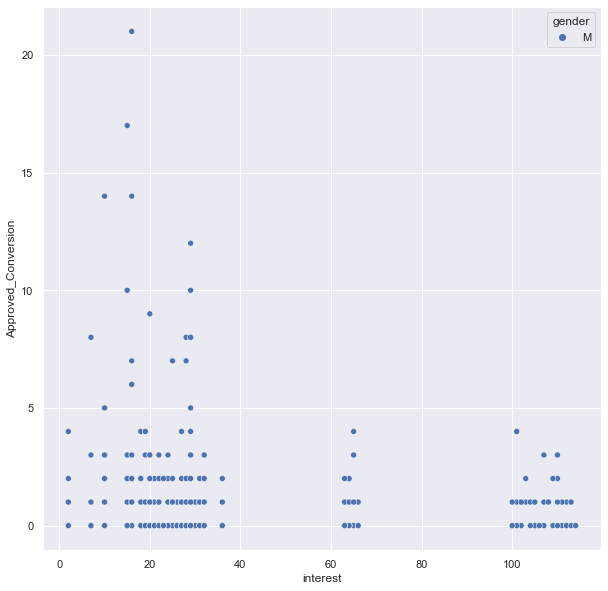

In [28]:
#Interest - Approved_Conversion variation for Men
plt.figure(figsize = (10,10))
x = data.loc[data['gender']=='M']
y = data.loc[data['gender']=='F']
sns.scatterplot(x = x['interest'], y=x['Approved_Conversion'],hue = x['gender'])

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

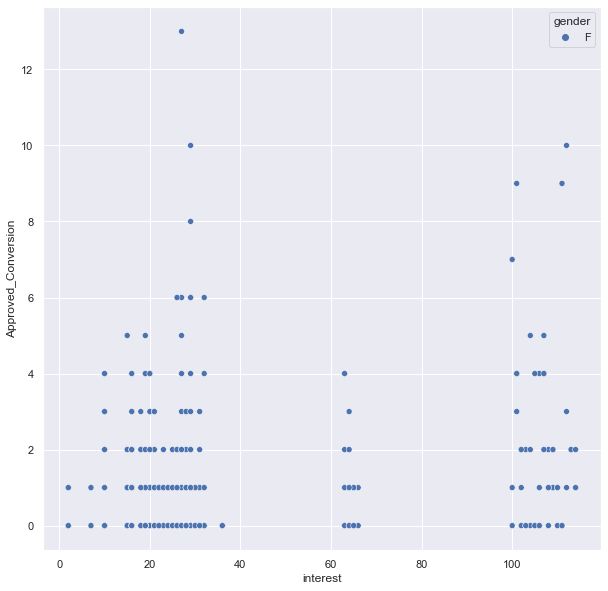

In [29]:
#Interest - Approved_Conversion variation for Women
plt.figure(figsize = (10,10))
sns.scatterplot(x = y['interest'], y=y['Approved_Conversion'],hue = y['gender'])

- slight differences are visible.
- women with interests > 100 seem to have more conversions than man with interests >100
- similar diffences visible in 0 to ~35 interests

In [30]:
#Interest vs Age

In [31]:
m = data[data['age'] == '30-34'] 
n = data[data['age'] == '35-39']
o = data[data['age'] == '40-44']
p = data[data['age'] == '45-49']
#30-34 
#35-39 
#40-44
#45-49

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

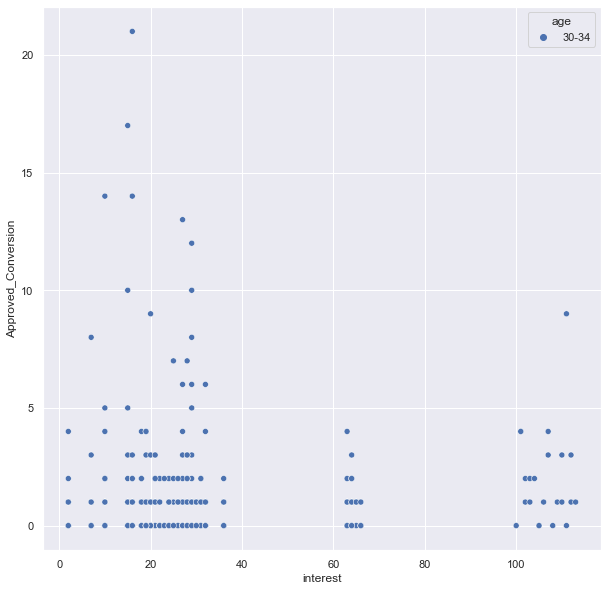

In [32]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = m['interest'],y = m['Approved_Conversion'],hue = m['age'])

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

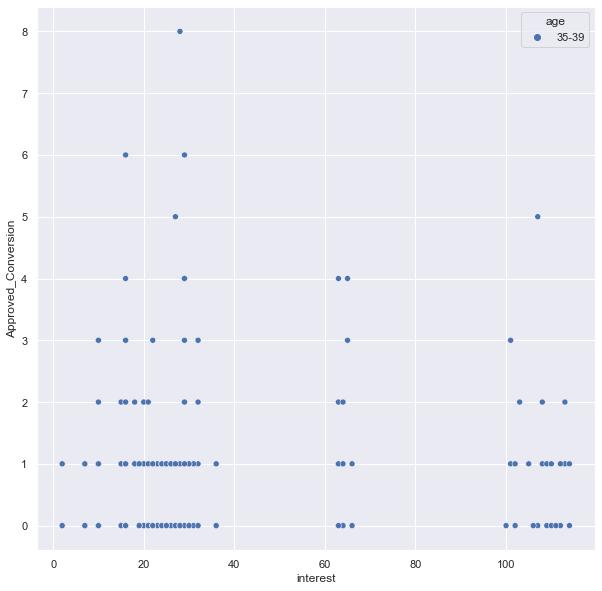

In [33]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = n['interest'],y = n['Approved_Conversion'],hue = n['age'])

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

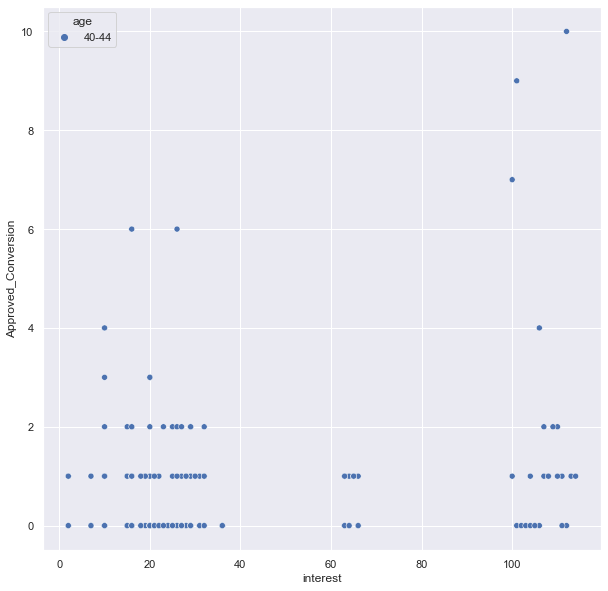

In [34]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = o['interest'],y = o['Approved_Conversion'],hue = o['age'])

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

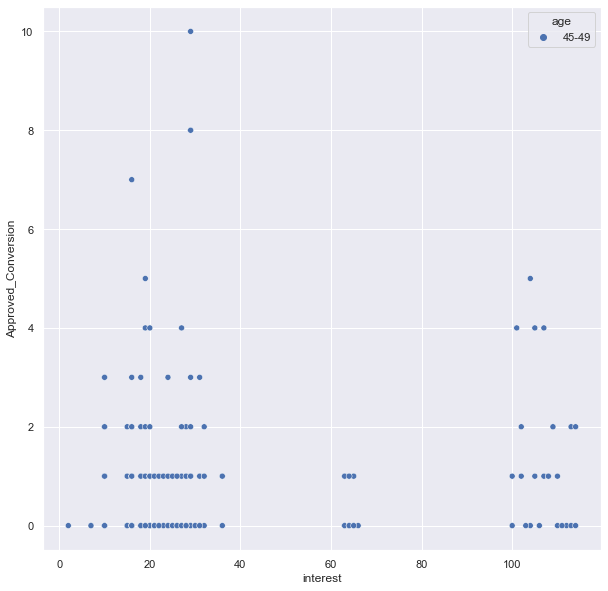

In [35]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = p['interest'],y = p['Approved_Conversion'],hue = p['age'])

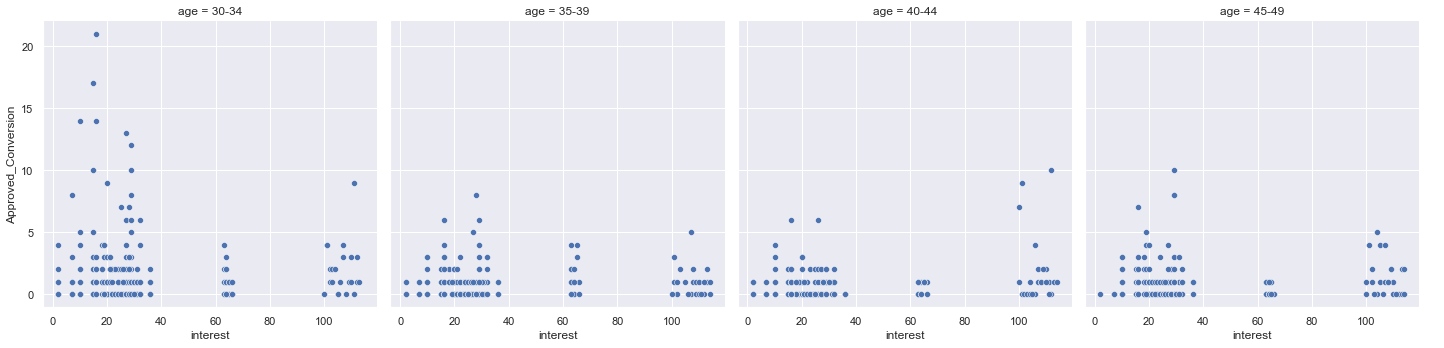

In [36]:

plot1 = sns.FacetGrid(data, col="age",height = 5)
plot1.map(sns.scatterplot, "interest", "Approved_Conversion")
plot1.add_legend()

#### Spent

In [37]:
data['Spent'].value_counts()

0.00      207
1.38        5
1.29        4
1.54        4
1.23        3
         ... 
1.21        1
68.56       1
122.40      1
31.54       1
73.75       1
Name: Spent, Length: 869, dtype: int64

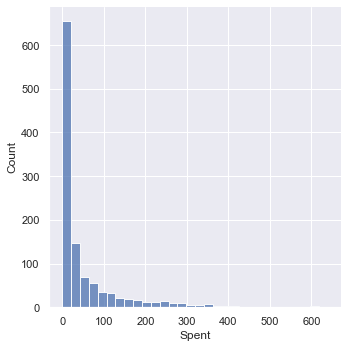

In [38]:
sns.displot(data, x='Spent', bins=30)

#Spent vs Approved_Conversion

<AxesSubplot:xlabel='Spent', ylabel='Approved_Conversion'>

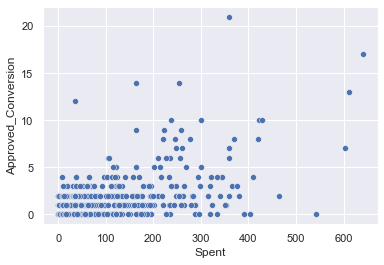

In [39]:
sns.scatterplot(x = data['Spent'], y = data['Approved_Conversion'])

- Clearly, spending more means more conversions, but there seems to be fewer returns beyond the 400 mark

In [40]:
#Spent - Approved_Conversion split by Gender

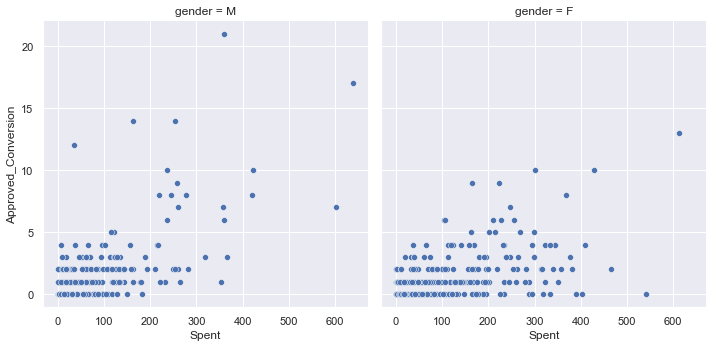

In [41]:
plot2 = sns.FacetGrid(data, col="gender",height = 5)
plot2.map(sns.scatterplot, "Spent", "Approved_Conversion")
plot2.add_legend()

- Spent for Men seems to be more effective when it is less than ~250
- Significant Approved_Conversion for women upto the 400 mark.

In [42]:
#Spent - Approved_Conversion split by Age

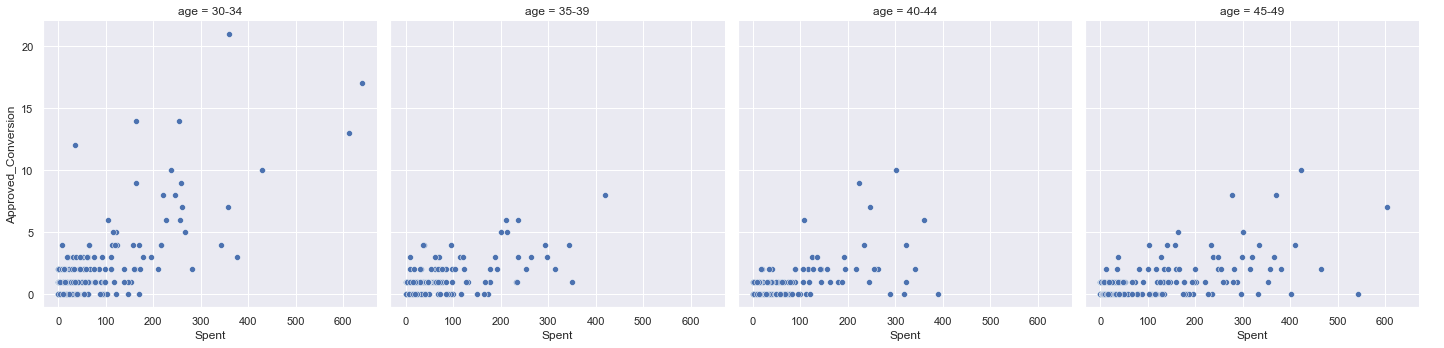

In [43]:
plot2 = sns.FacetGrid(data, col="age",height = 5)
plot2.map(sns.scatterplot, "Spent", "Approved_Conversion")
plot2.add_legend()

- Approved_Conversion seems similar for age groups 35-39 and 40-44
- Approved_Conversion is gives more results at less than ~300 for age group 30-34 
- Approved Conversion is spread out for age group 45-49

- 400 seems to be the sweet spot for Spent


In [44]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


#### Impressions

Number of times ad was shown

In [45]:
data['Impressions'].value_counts()

3812      2
529       2
2479      2
1539      2
2879      2
         ..
175389    1
25884     1
345371    1
7449      1
61441     1
Name: Impressions, Length: 1130, dtype: int64

In [46]:
#impressions vs Approved_Conversion

<AxesSubplot:xlabel='Impressions', ylabel='Approved_Conversion'>

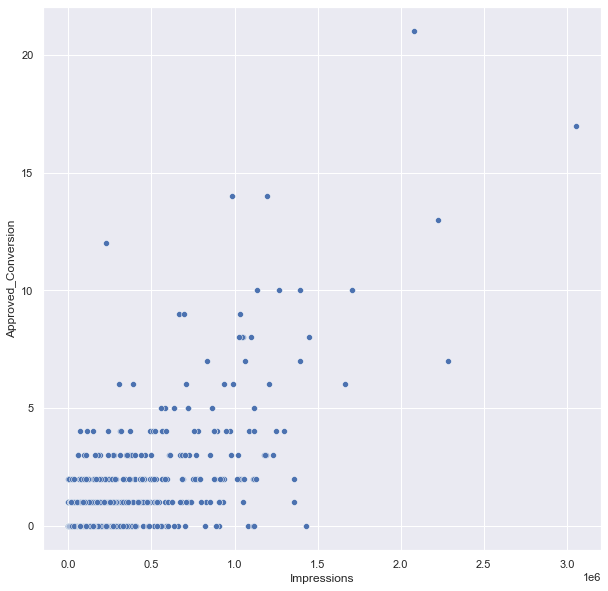

In [47]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = data, x = data['Impressions'], y = data['Approved_Conversion'])

- showing the ads a certain number of times beyind the 1.5 range seems to significantly increase approved conversion

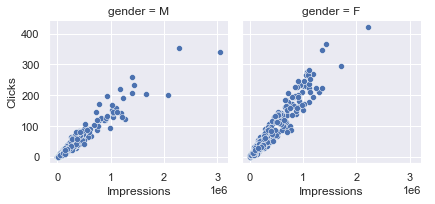

In [48]:
plotx = sns.FacetGrid(data = data, col ='gender')

plotx.map(sns.scatterplot,'Impressions','Clicks')
plotx.add_legend()



- impressions and spent seems to be optimal at the 400-1.5 mark

##### Impressions vs clicks

<AxesSubplot:xlabel='Impressions', ylabel='Clicks'>

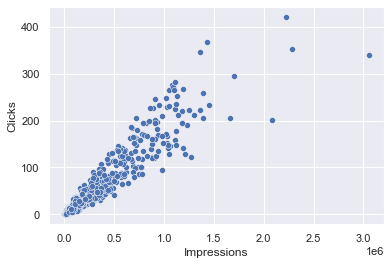

In [49]:
sns.scatterplot(x= data['Impressions'], y = data['Clicks'])

#### Clicks

- People who clicked on ad

In [50]:
data['Clicks'].value_counts()

0      207
1      119
2       70
3       51
4       34
      ... 
161      1
162      1
163      1
166      1
96       1
Name: Clicks, Length: 183, dtype: int64

<AxesSubplot:xlabel='Clicks', ylabel='Total_Conversion'>

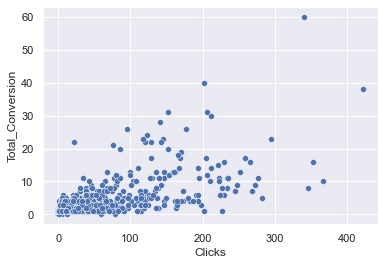

In [51]:
#Clicks vs Total_Conversion

sns.scatterplot(x = data['Clicks'], y = data['Total_Conversion'])

- beyond the 200 clicks mark, people seemed to be likelier to ask about the product

<AxesSubplot:xlabel='Clicks', ylabel='Approved_Conversion'>

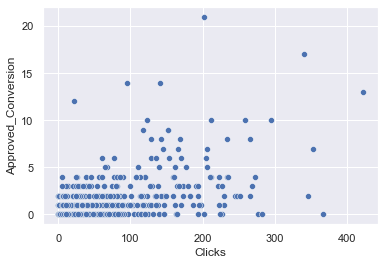

In [52]:
#Clicks vs Approved_Conversion

sns.scatterplot(x = data['Clicks'], y = data['Approved_Conversion'])

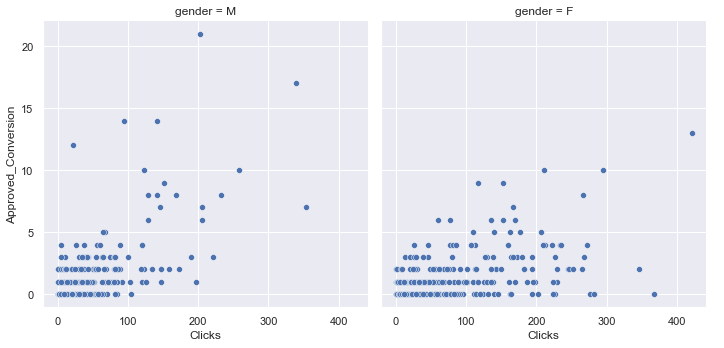

In [53]:
#Clicks vs Approved_Conversion divided by Gender

plot3 = sns.FacetGrid(data, col = 'gender', height = 5)
plot3.map(sns.scatterplot,  'Clicks',  'Approved_Conversion')
plot3.add_legend()


- women seemed likelier to buy after clicking on the ads

#### Total_Conversion

In [54]:
data['Total_Conversion'].value_counts()

1     666
2     162
3      78
4      61
5      41
6      22
7      16
11     13
8      13
13      9
0       8
10      8
9       7
22      4
17      4
16      4
14      4
12      4
23      3
26      2
31      2
20      2
60      1
40      1
18      1
19      1
21      1
24      1
28      1
30      1
38      1
15      1
Name: Total_Conversion, dtype: int64

<AxesSubplot:xlabel='Total_Conversion', ylabel='Approved_Conversion'>

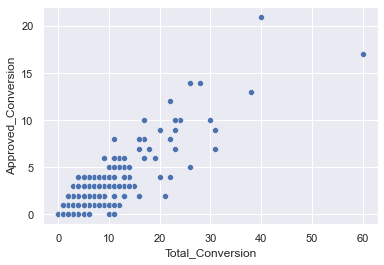

In [55]:
sns.scatterplot(x = data['Total_Conversion'], y = data['Approved_Conversion'])

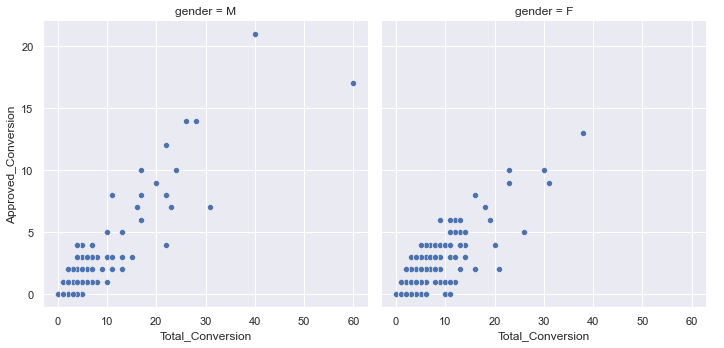

In [56]:
plot4 =sns.FacetGrid(data = data, height = 5, col = 'gender')
plot4.map(sns.scatterplot, 'Total_Conversion', 'Approved_Conversion')
plot4.add_legend()

- clearly women who clicked the ad were likelier to purchase a product especially for approved_conversions >4

### Inferences

In [57]:
data.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

### xyz_campaign_id:

- Campaign_3 (Actual name : 1178) was most successful at conversions. It was also the most shown campaign

- Campaign_2 (Actual name: 936) was moderately successful compared to 3(1178) and far more successful compared to Campaign_1(Actual Name:916)

### age:

- Atleast for Campaign_3(1178), Age Groups 30-34 and 45-49 had the most Approved_Conversion. The middle age groups showed excellent response 
  compared to Campaign_1(916) and Campaign_2(936)

### gender

- Approximately equal number of men and women were targeted.

### interest

- 0 to 40, with significant clustering around ~16 to ~35
- ~62 to ~65
- ~100 to ~114

- For Men : 0 to 40 are the more important Approved_Convversion zones
- For Women : Interest beyond 100 are the more important Approved_Conversion Zones

- All age groups seem highly interested in the range of interests 0 to 40

### Impressions

- showing the ads a certain number of times beyind the 1.5 range seems to significantly increase approved conversion
- impressions and spent seems to be optimal at the 400-1.5 mark

### Clicks

- women seemed likelier to buy after clicking on the ads

### Spent

- Clearly, spending more means more conversions, but there seems to be fewer returns beyond the 400 mark

- Spent for Men seems to be more effective when it is less than ~250
- Significant Approved_Conversion for women upto the 400 mark.


- Approved_Conversion seems similar for age groups 35-39 and 40-44

- Approved_Conversion is gives more results at less than ~300 for age group 30-34

- Approved Conversion is spread out for age group 45-49

- 400 seems to be the sweet spot for Spent



### Total_Conversion

- clearly women who clicked the ad were likelier to purchase a product especially for approved_conversions >4


# *Random Forest Regression*

In [58]:
data['xyz_campaign_id'].value_counts()


Campaign_3    625
Campaign_2    464
Campaign_1     54
Name: xyz_campaign_id, dtype: int64

Features to be used:
'xyz_campaign_id', , 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



In [60]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


In [61]:
data1 = data.copy()
data1.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


In [62]:
#map campaign_id to numeric categories
cam = {'Campaign_1':0,'Campaign_2':1,'Campaign_3':2}

data1['xyz_campaign_id'] = data1['xyz_campaign_id'].map(cam)
data1

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,0,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,0,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,0,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,0,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,0,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,2,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,2,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,2,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,2,179981,45-49,F,113,790253,135,198.710000,8,2


In [63]:
e = {'30-34':0,'35-39':1,'40-44':2,'45-49':3}
data1['age'] = data1['age'].map(e)
data1


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,0,103916,0,M,15,7350,1,1.430000,2,1
1,708749,0,103917,0,M,16,17861,2,1.820000,2,0
2,708771,0,103920,0,M,20,693,0,0.000000,1,0
3,708815,0,103928,0,M,28,4259,1,1.250000,1,0
4,708818,0,103928,0,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,2,179977,3,F,109,1129773,252,358.189997,13,2
1139,1314411,2,179978,3,F,110,637549,120,173.880003,3,0
1140,1314412,2,179979,3,F,111,151531,28,40.289999,2,0
1141,1314414,2,179981,3,F,113,790253,135,198.710000,8,2


In [64]:
gen = {'M':0,'F':1}

data1['gender'] = data1['gender'].map(gen)
data1

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,0,103916,0,0,15,7350,1,1.430000,2,1
1,708749,0,103917,0,0,16,17861,2,1.820000,2,0
2,708771,0,103920,0,0,20,693,0,0.000000,1,0
3,708815,0,103928,0,0,28,4259,1,1.250000,1,0
4,708818,0,103928,0,0,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,2,179977,3,1,109,1129773,252,358.189997,13,2
1139,1314411,2,179978,3,1,110,637549,120,173.880003,3,0
1140,1314412,2,179979,3,1,111,151531,28,40.289999,2,0
1141,1314414,2,179981,3,1,113,790253,135,198.710000,8,2


## Training and Evaluating the Model

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
y = data1['Approved_Conversion']
feature = ['xyz_campaign_id','fb_campaign_id','age','gender','interest','Impressions','Clicks','Spent']
X = data1[feature]

In [67]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [68]:
random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(train_X, train_y)
soc_med_pred = random_forest.predict(val_X)
print(mean_absolute_error(val_y, soc_med_pred))

0.8326923076923077


In [69]:
from sklearn.metrics import r2_score as r2
r2_score=r2(val_y, soc_med_pred)
r2_score

0.5937289786598501

- Mean Absolute Error of 0.77 obtained
- R-Squared value of 59% obtained

# Business Questions

- How to optimize the social ad campaigns for the highest conversion rate possible. (Attain best Reach to Conversion ratios/Click to  Conversion ratios)

Campaign_C (1178) performed the best when it came to click-to-conversion rations. 
It would be prudent to target more women with this campaign. 
[Clicks](#Clicks)


- Finding the perfect target demographics with the appropriate clickthrough rates

Ideally, target more women in the 30-34 demographic and in the 45-49 demographic. [Interest](#Interest)


- Understanding the ideal turnaround/decision making time per age group to convert and retarget future social campaigns

Once again, women were showed far more interest than men in clicking on ads. [Impressions](#Impressions)
- Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences. 

Campaign 3 is clearly the best at highest conversion rates, although campaign 2 did moderately well too

## Addendum :  With feature scaling and Some Tuning

In [70]:
X1 = X.copy()
y1 = y.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

#scaler.fit(X1) only computes mean and stdev

In [71]:
train_X1, val_X1, train_y1, val_y1 = train_test_split(X1, y1, random_state = 1)

In [72]:
random_forest1= RandomForestRegressor(random_state=1)
random_forest1.fit(train_X1, train_y1)
soc_med_pred1 = random_forest1.predict(val_X1)
print(mean_absolute_error(val_y1, soc_med_pred1))

0.8311888111888112


In [73]:
r2_score1=r2(val_y1, soc_med_pred1)
r2_score1

0.5946628849891336

In [74]:
#adding tree numbers 
random_forest2= RandomForestRegressor(n_estimators = 8, random_state=1)
random_forest2.fit(train_X1, train_y1)
soc_med_pred2 = random_forest2.predict(val_X1)
print(mean_absolute_error(val_y1, soc_med_pred2))

0.8326048951048951


In [75]:
r2_score2=r2(val_y1, soc_med_pred2)
r2_score2

0.6412734051134025

- at estimators = 5, mae = 0.86, r2_score = 0.60
- at estimators = 10, mae = 0.83, r2_score = 0.62
- at estimators = 15, mae = 0.83, r2_score = 0.61
- at estimators = 20, mae = 0.83, r2_score = 0.59

- at estimators = 8, mae = 0.83, r2_score = 0.64


setting number of trees at 8 seems to yield the best results